Venture Outcome Prediction

Problem Statement:
In today’s fast-moving world of new ventures, not every company ends up the same way. Some get bought by bigger companies, some grow on their own, some change direction and expand while others eventually shut down.

The aim of this project is to predict whether a new venture will turn out successful or not based on early signs like how much funding it gets at the start, how quickly it hits important milestones, who it’s connected with (partners, investors) and where it’s based.

This prediction can help investors, incubators and founders understand which ventures are more likely to succeed and which ones might struggle, so they can make better decisions about funding and support.

1. Importing Libraries

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import display, Image
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


2. Data Loading

In [53]:
df=pd.read_csv(r"C:\Users\anamr\Desktop\Any\Venture Outcome Prediction\data.csv")

3. Exploratory Data Analysis(EDA)

In [54]:
print("Dataset Shape (Rows, Column) : ",df.shape)
print("Size of Dataset = ",df.size)
print("Columns : \n",df.columns)

Dataset Shape (Rows, Column) :  (923, 49)
Size of Dataset =  45227
Columns : 
 Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [56]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [57]:
df_cat=df.select_dtypes(include='object')

In [58]:
numeric = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numeric)

In [59]:
print(df.isnull().sum())

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [60]:
print(df.isna().sum())

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

4. Data Cleaning - Missing Values

In [61]:
# Drop columns with >=50% missing values
columns=df.columns
d_c1=[]
for i in columns:
  df1=df[i].isnull().sum()
  r,c=df.shape
  val=(df1/r)*100
  if val >= 50:
    d_c1.append(i)
print(d_c1)

df.drop(['Unnamed: 6','closed_at'],axis=1,inplace=True)

['Unnamed: 6', 'closed_at']


In [62]:
# Drop again if any left with >=50%
columns=df.columns
d_c2=[]
for i in columns:
  df2=df[i].isna().sum()
  r,c=df.shape
  val=(df1/r)*100
  if val >= 50:
    d_c2.append(i)
print(d_c2)

[]


In [63]:
# Fill missing values in milestone columns with mean
mean_value1=df['age_first_milestone_year'].mean()
mean_value2=df['age_last_milestone_year'].mean()
df["age_first_milestone_year"].fillna(value=mean_value1,inplace=True)
df["age_last_milestone_year"].fillna(value=mean_value2,inplace=True)

In [64]:
# Drop rows with NA in state_code.1
n=df[df['state_code.1'].isna()==True].index.item()
df.drop(n,axis=0,inplace=True)

In [65]:
print(df.isnull().sum())

Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommer

5. Data Cleaning - Duplicates & Negative Values

In [66]:
df[df.duplicated()] # Check for duplicates

num_columns=df_num.columns
for a in range(len(num_columns)):
  if num_columns[a]=="latitude" or num_columns[a]=="longitude":
    pass
  else:
    print("Is there any negative value in '{}' column : {} ".
          format(num_columns[a],(df[num_columns[a]]<0).any()))

Is there any negative value in 'Unnamed: 0' column : False 
Is there any negative value in 'labels' column : False 
Is there any negative value in 'age_first_funding_year' column : True 
Is there any negative value in 'age_last_funding_year' column : True 
Is there any negative value in 'age_first_milestone_year' column : True 
Is there any negative value in 'age_last_milestone_year' column : True 
Is there any negative value in 'relationships' column : False 
Is there any negative value in 'funding_rounds' column : False 
Is there any negative value in 'funding_total_usd' column : False 
Is there any negative value in 'milestones' column : False 
Is there any negative value in 'is_CA' column : False 
Is there any negative value in 'is_NY' column : False 
Is there any negative value in 'is_MA' column : False 
Is there any negative value in 'is_TX' column : False 
Is there any negative value in 'is_otherstate' column : False 
Is there any negative value in 'is_software' column : False 


In [67]:
# Drop rows with negative values
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

6. Feature Engineering - Encode Target and Drop Unwanted

In [68]:
df['status'] = df['status'].astype('category')
df['status'].replace(['acquired','closed'],[1, 0], inplace=True)
df['status'] = df['status'].astype(int)
df.drop(['labels','state_code.1', ],axis=1, inplace=True)
df.drop(['id','name','object_id' ],axis=1, inplace=True)
df.drop(['Unnamed: 0' ],axis=1, inplace=True)

7. Outlier Detection & Removal

In [69]:
columns_outliers = ['latitude', 'longitude', 'age_first_funding_year',
                    'age_last_funding_year', 'age_first_milestone_year',
                    'age_last_milestone_year', 'relationships', 'funding_rounds',
                    'funding_total_usd', 'milestones', 'avg_participants']

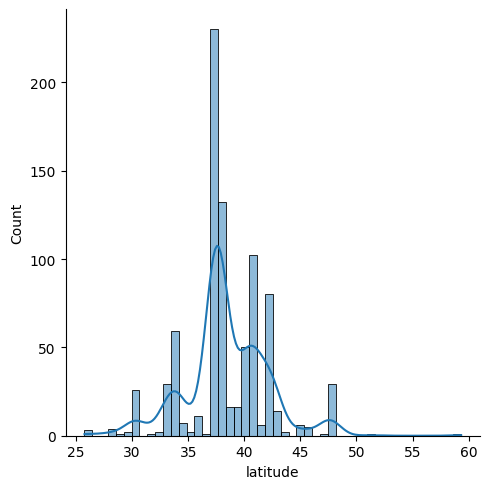

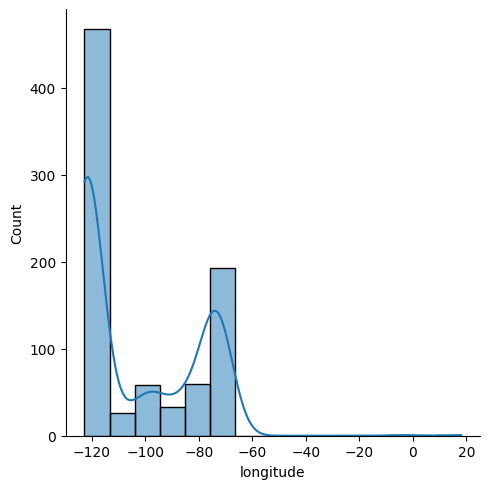

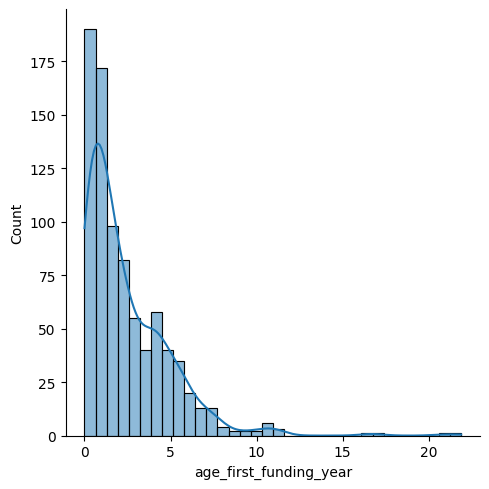

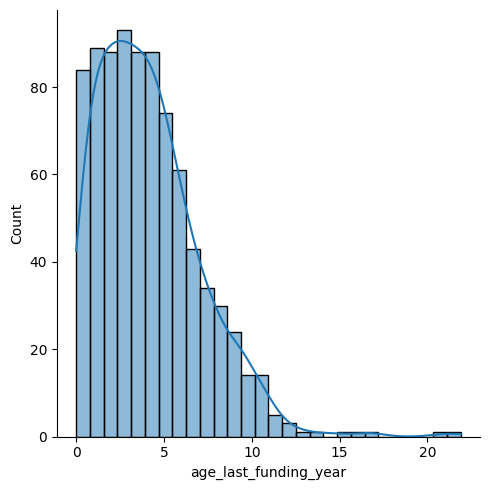

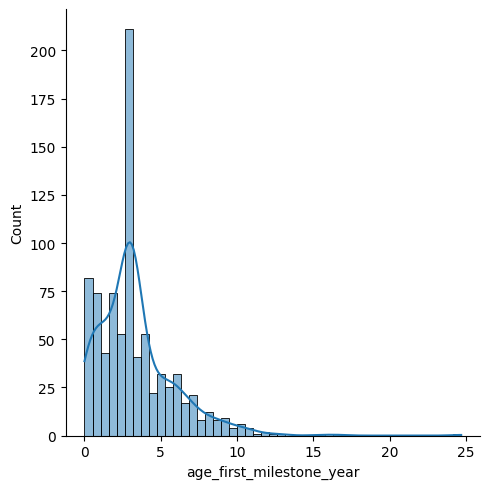

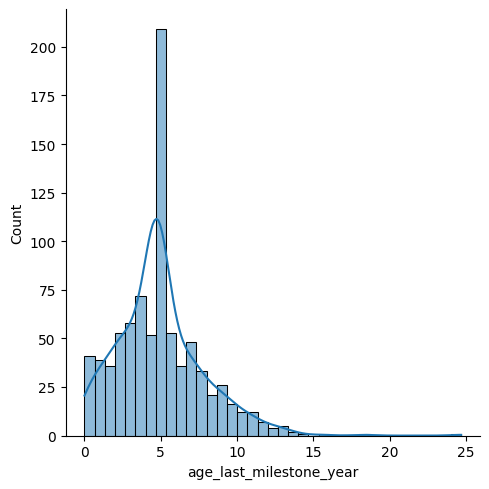

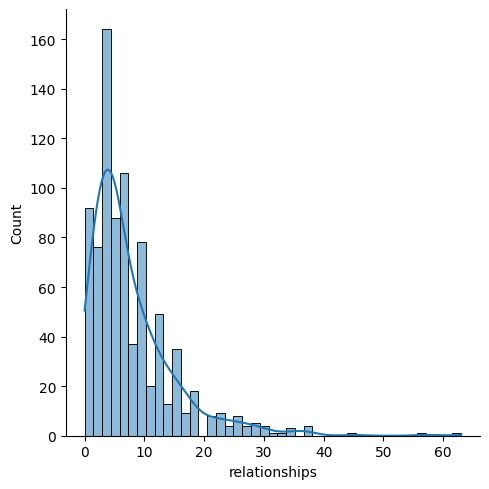

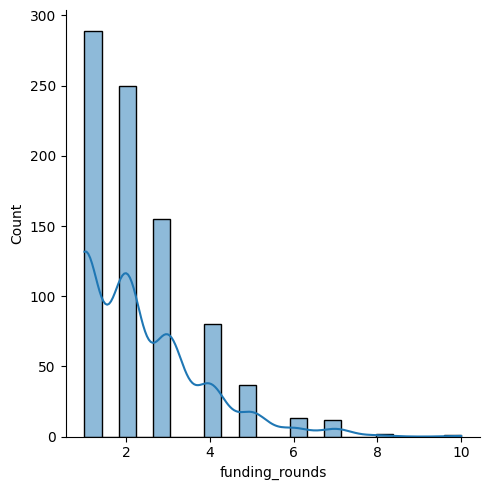

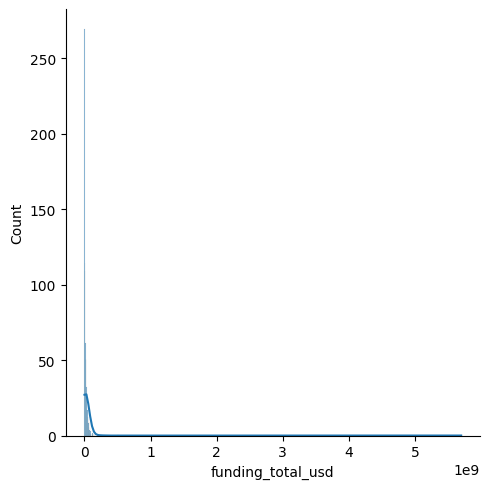

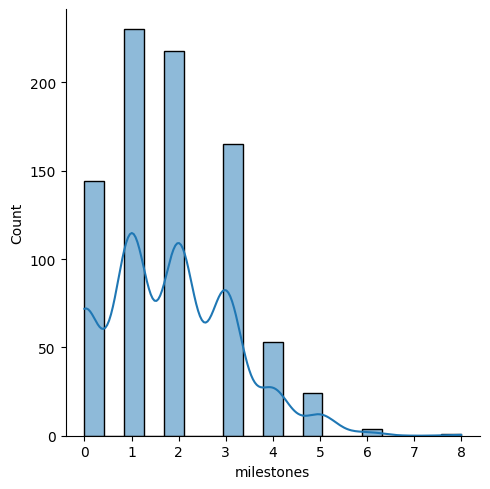

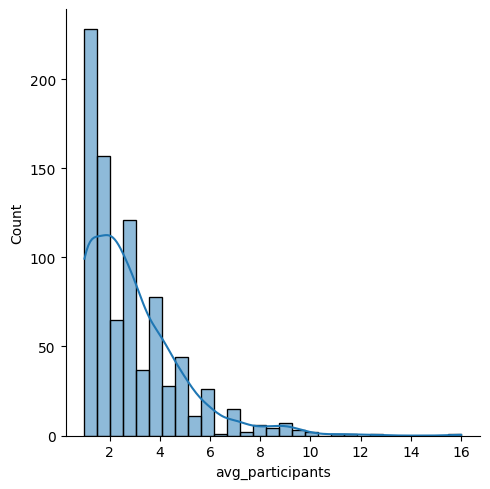

0.19768834931739143
0.7725796592228346
2.3275901020883847
1.2169770006955862
1.7928624864504816
1.036617824294794
2.3258619471575734
1.3629513375303224
27.819299567666462
0.5846778923185426
1.7566113393008431


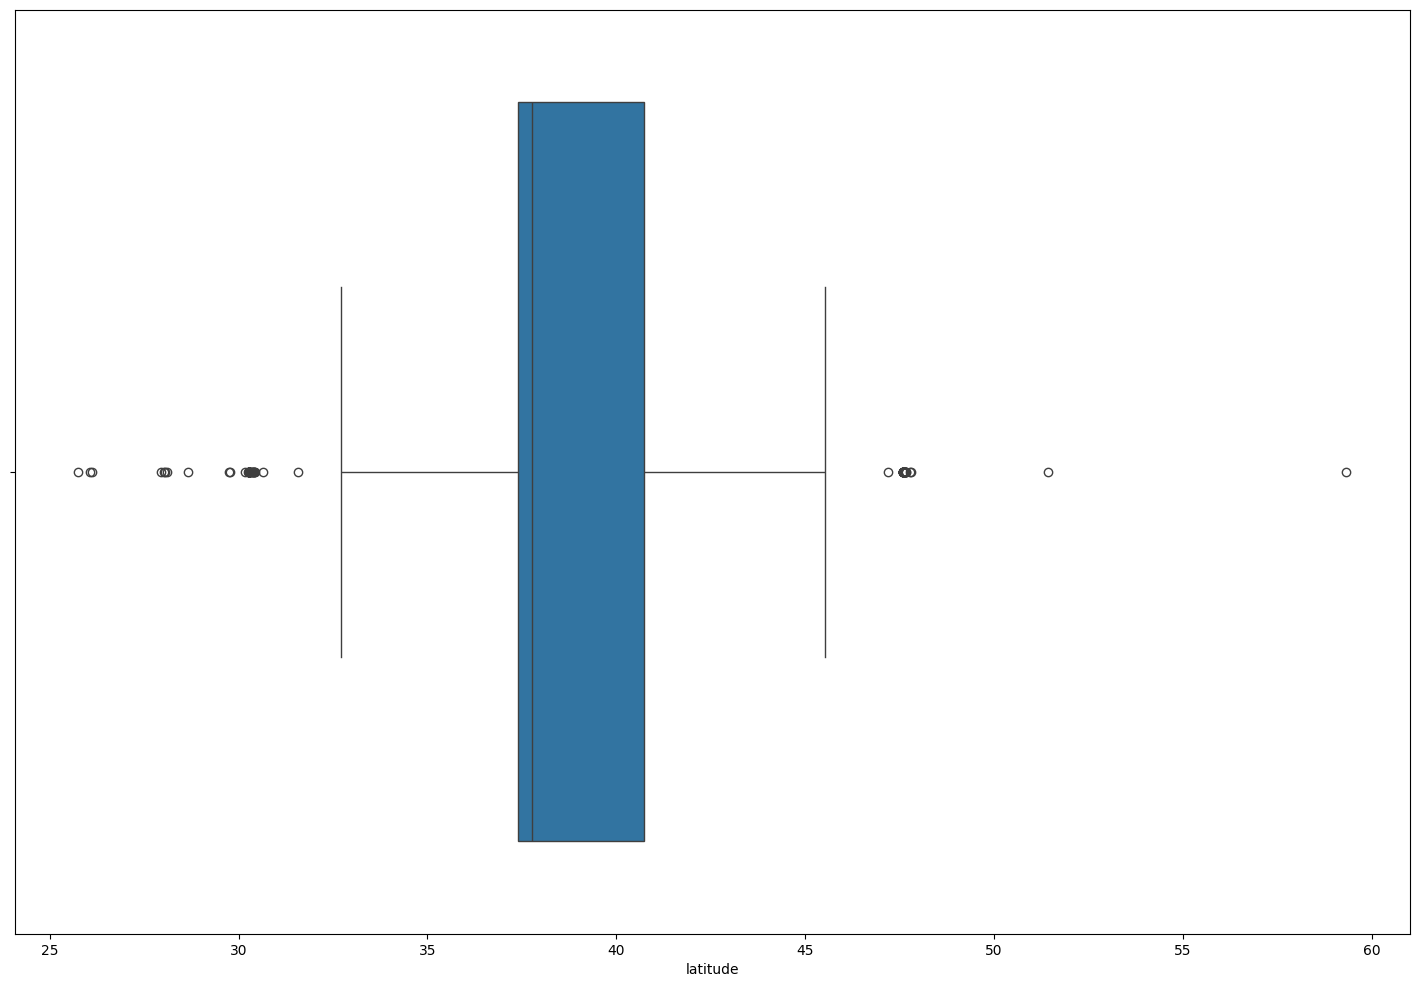

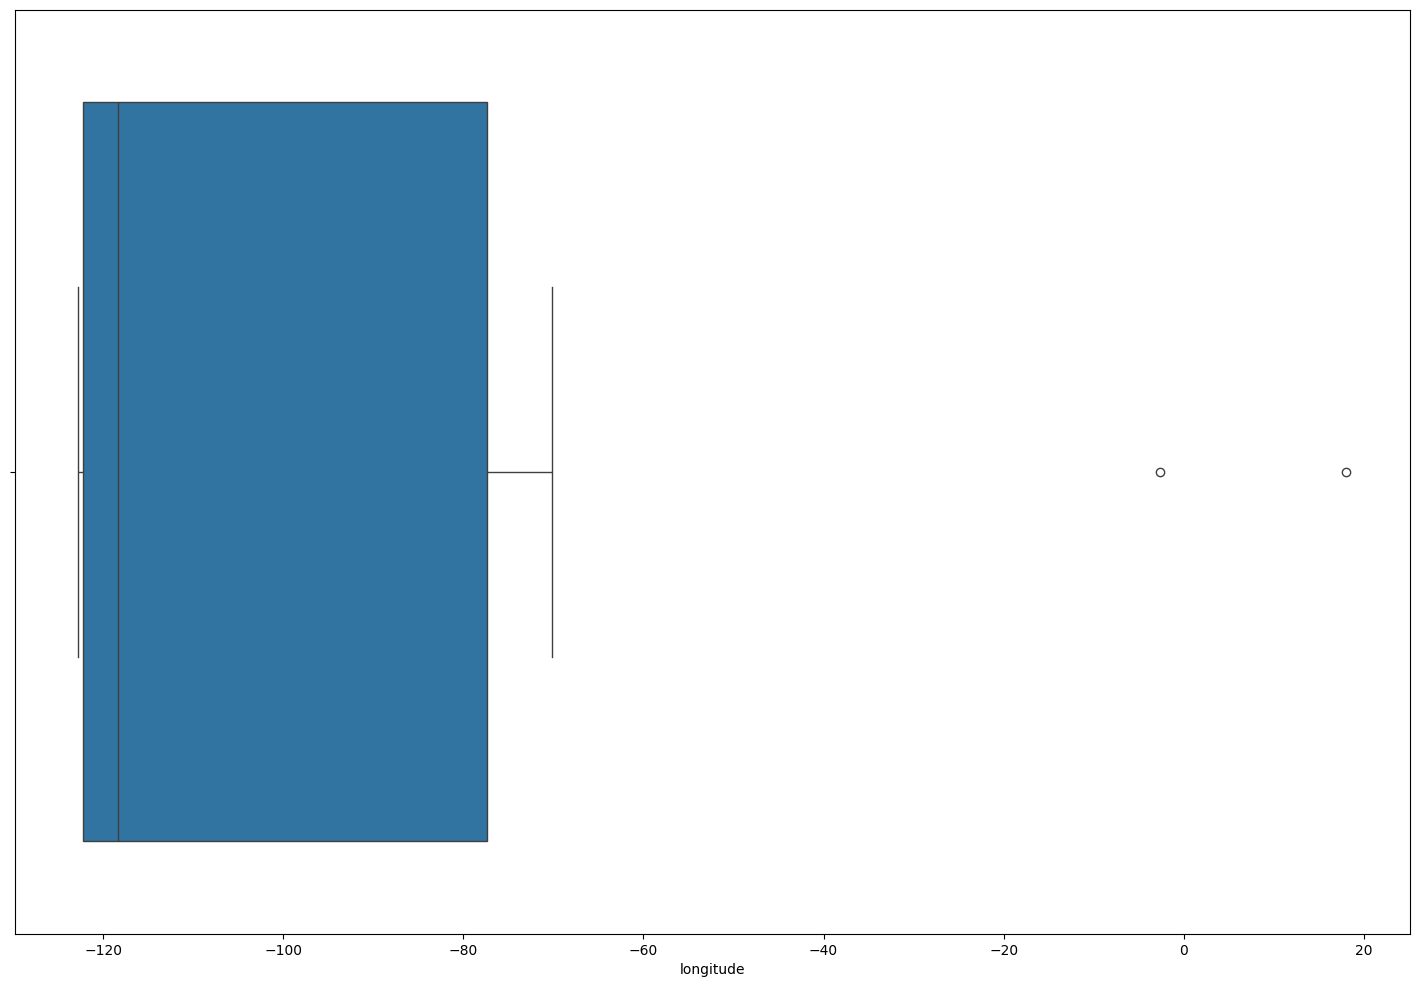

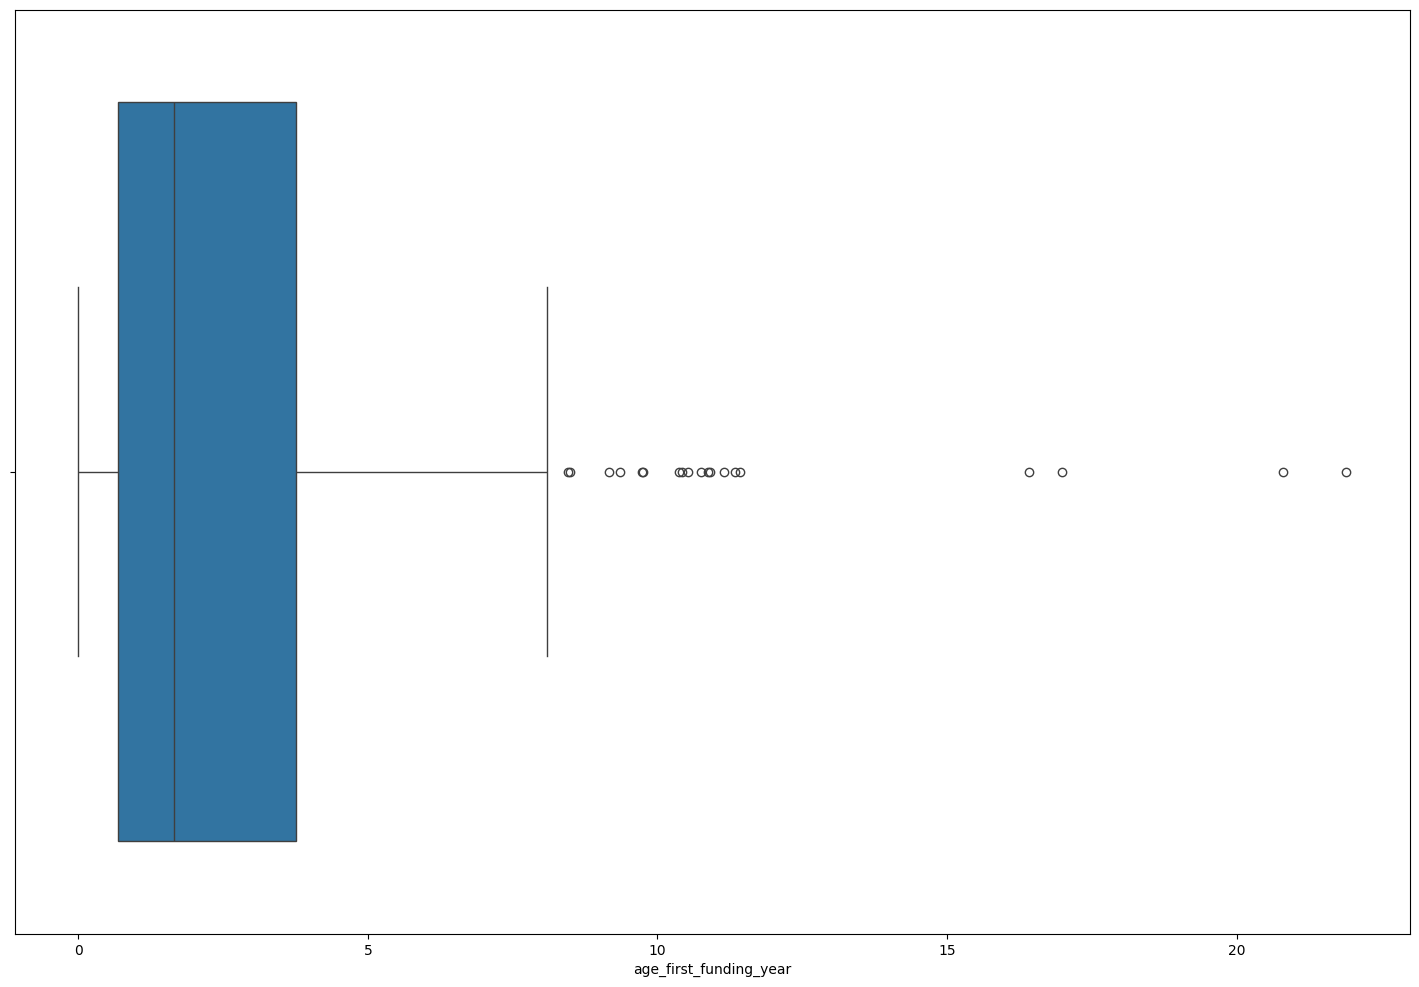

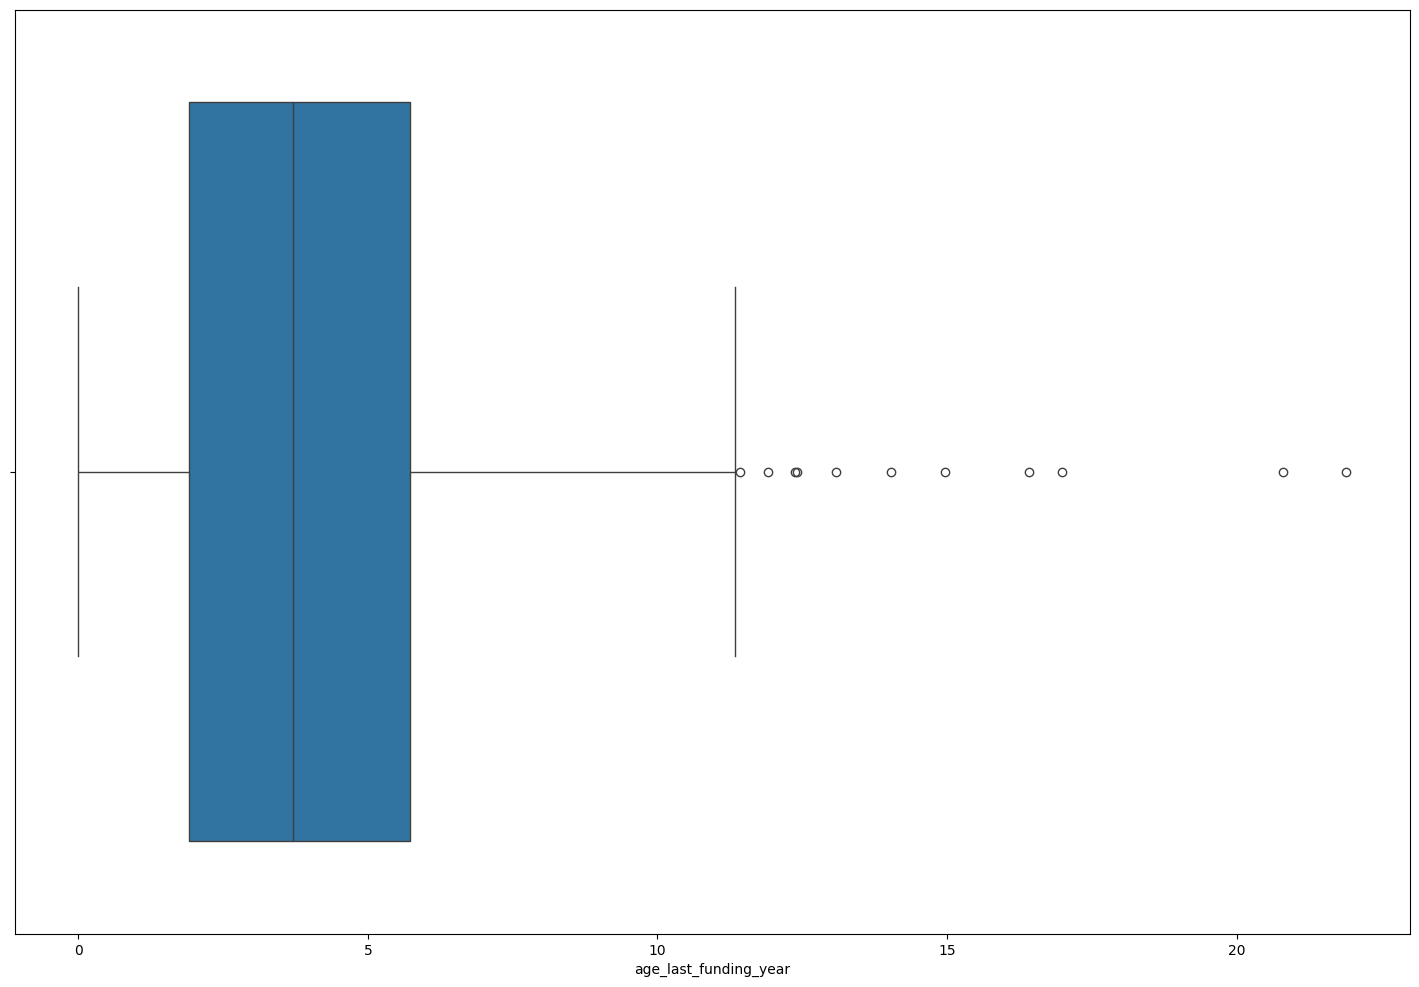

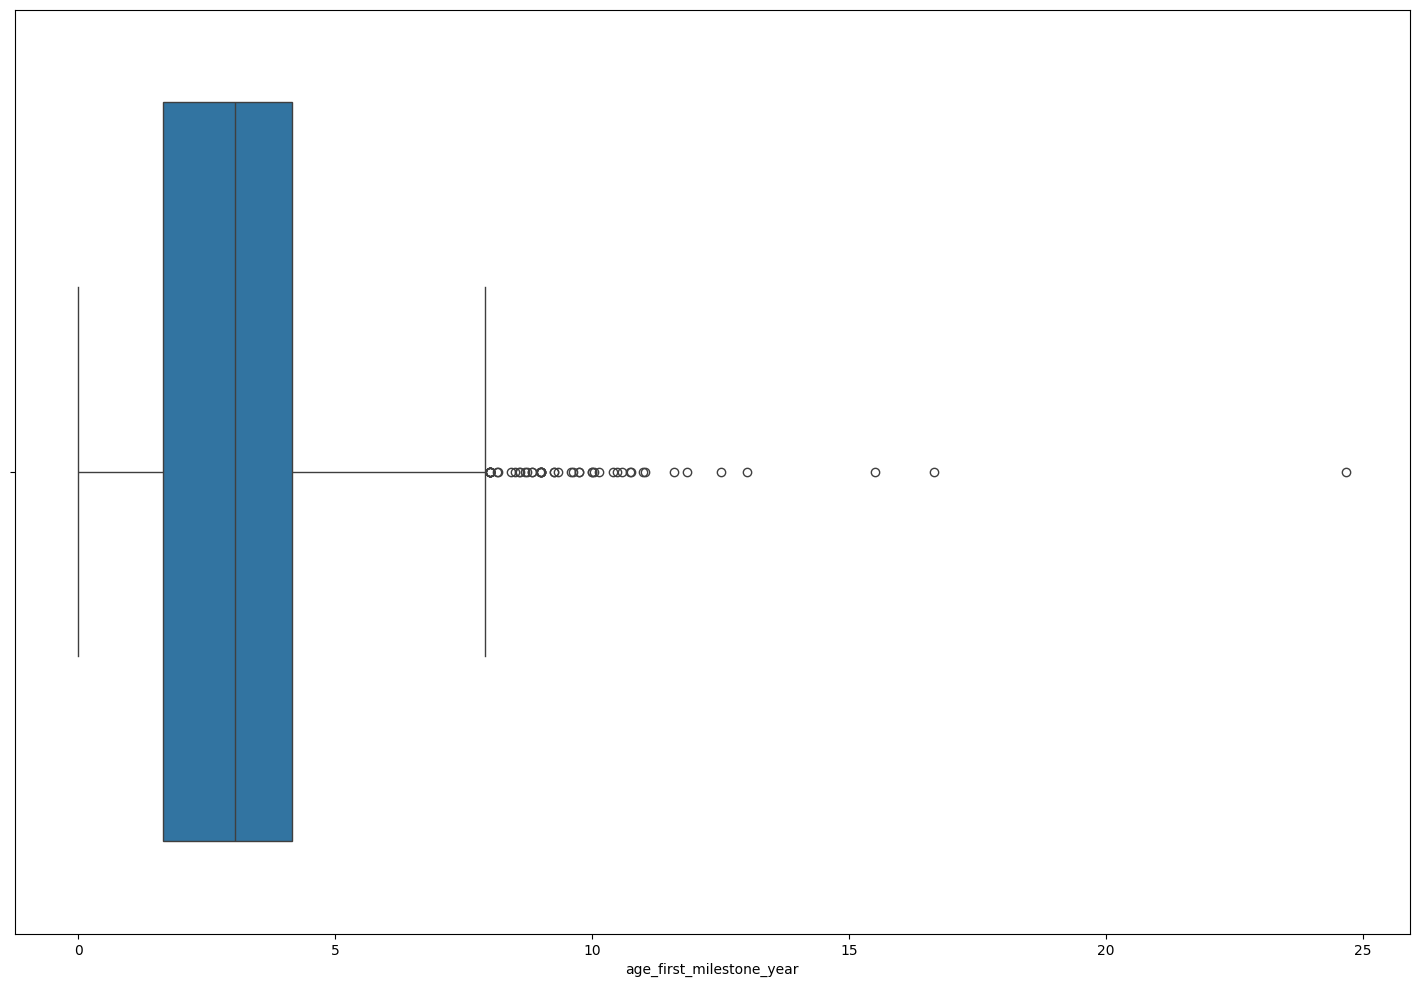

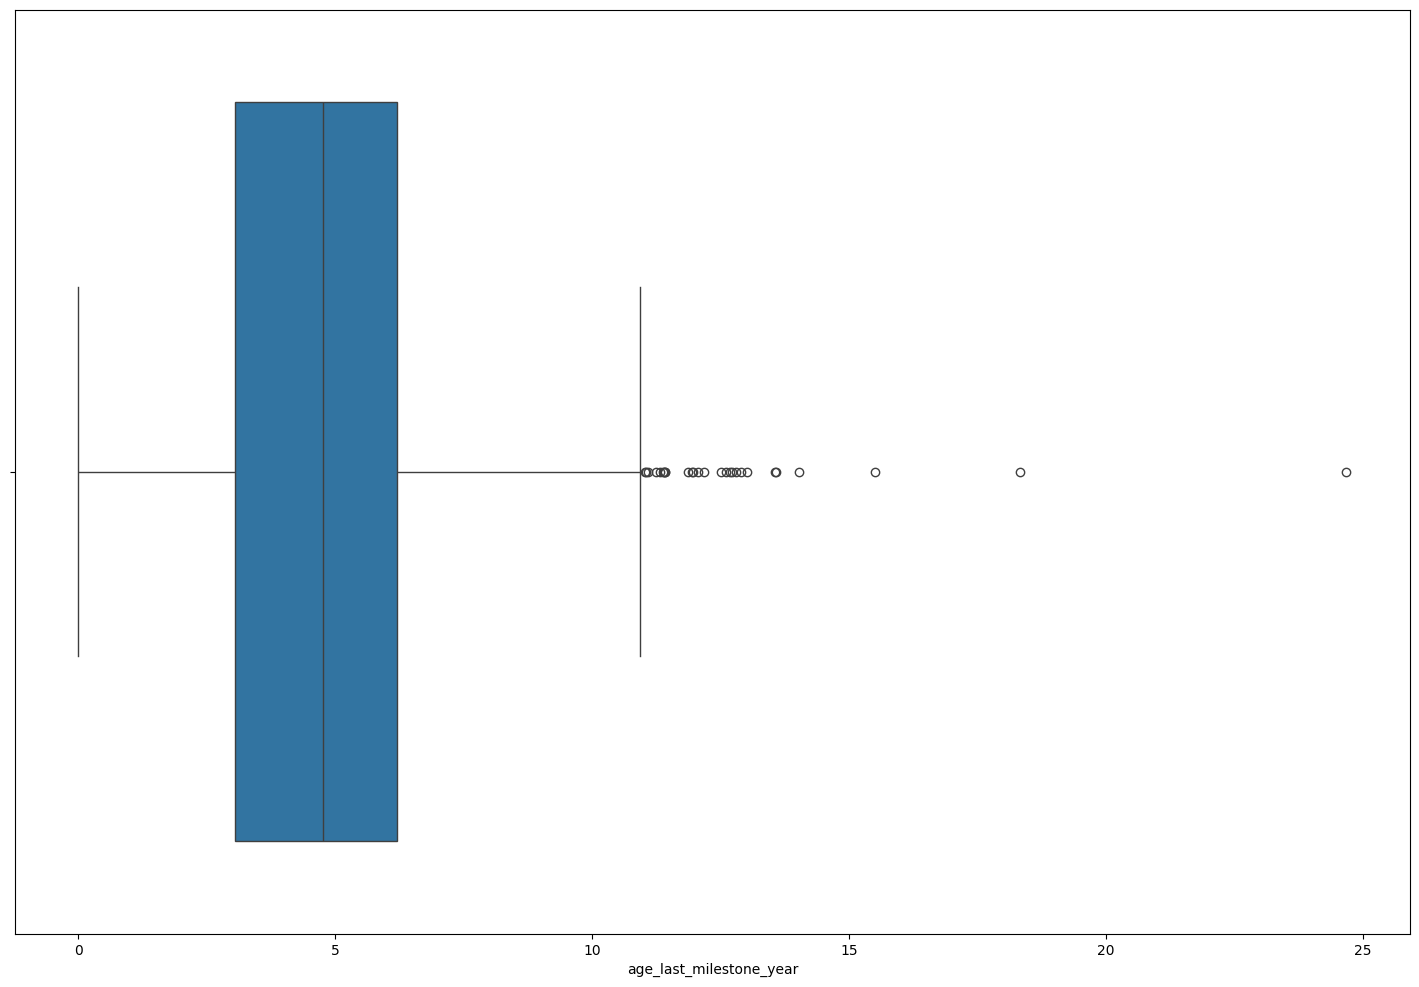

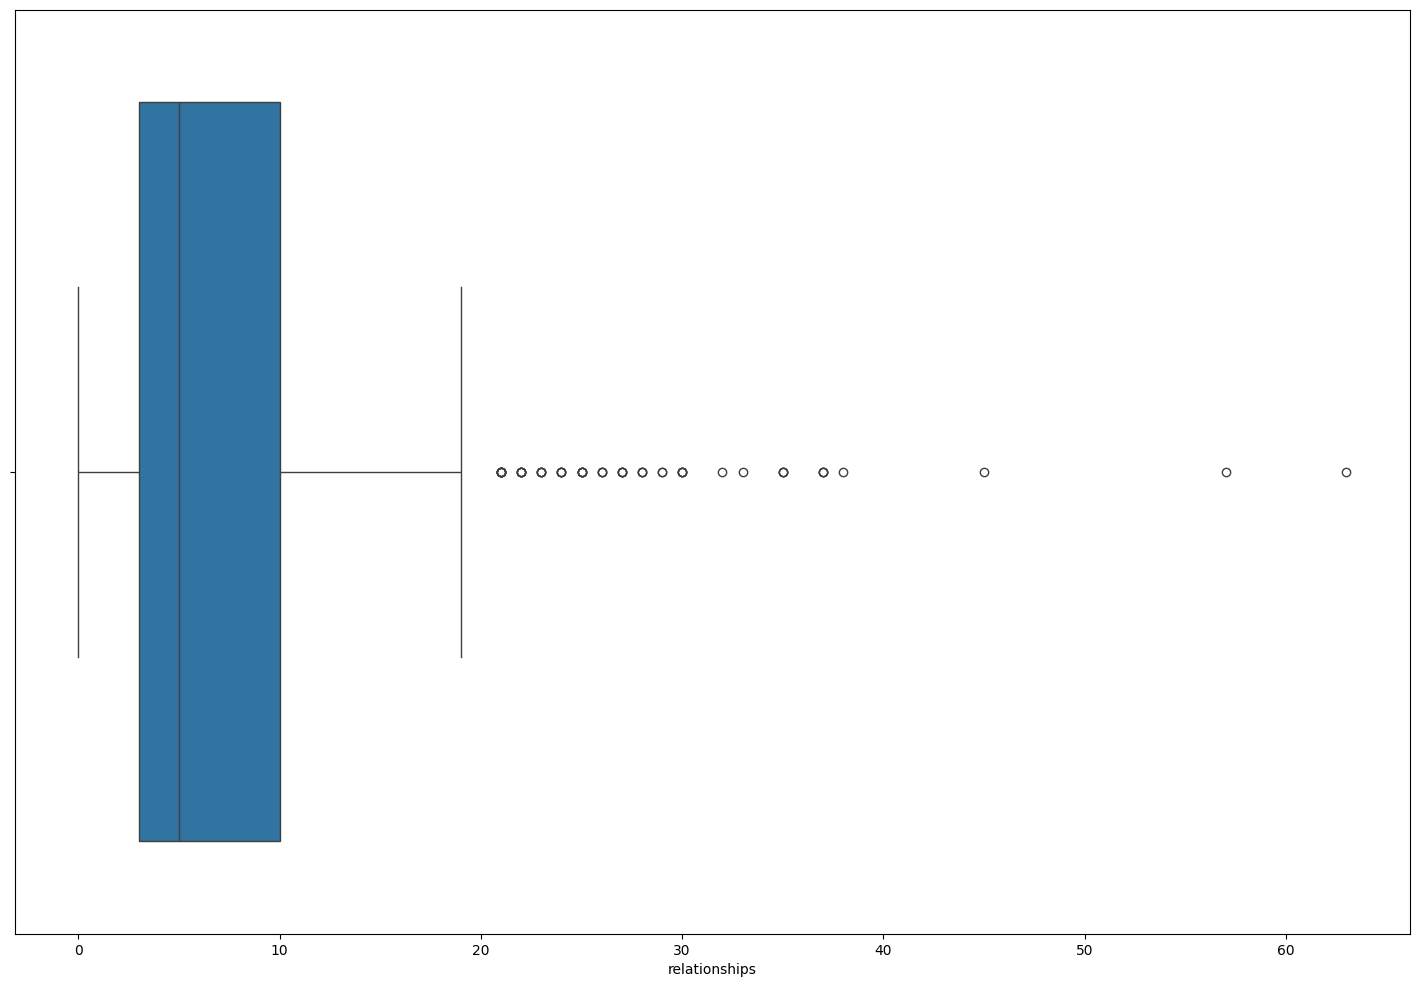

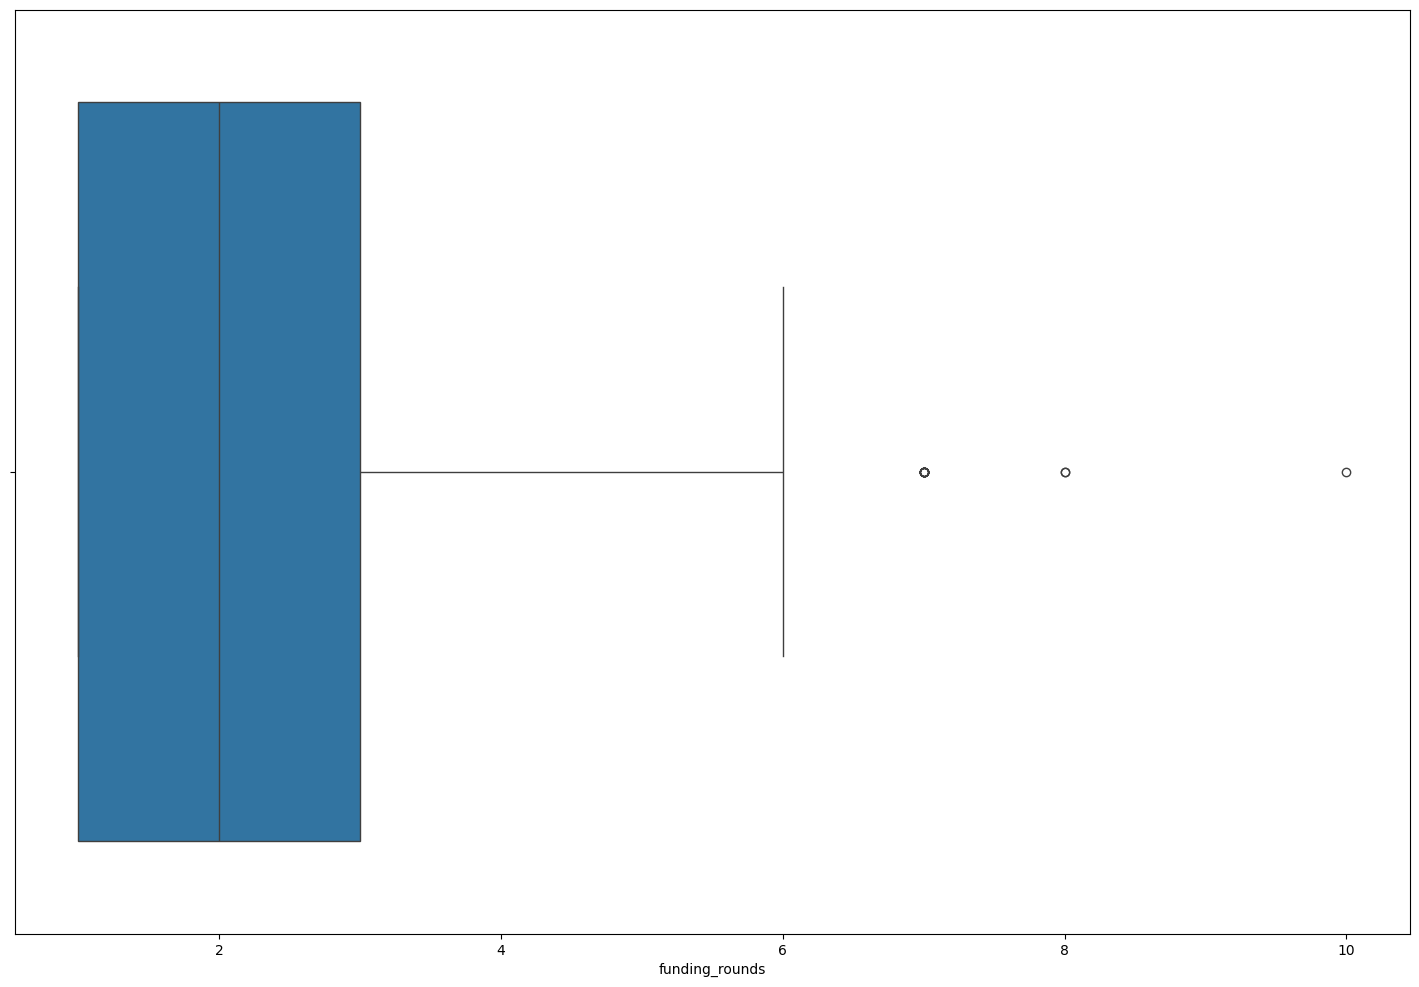

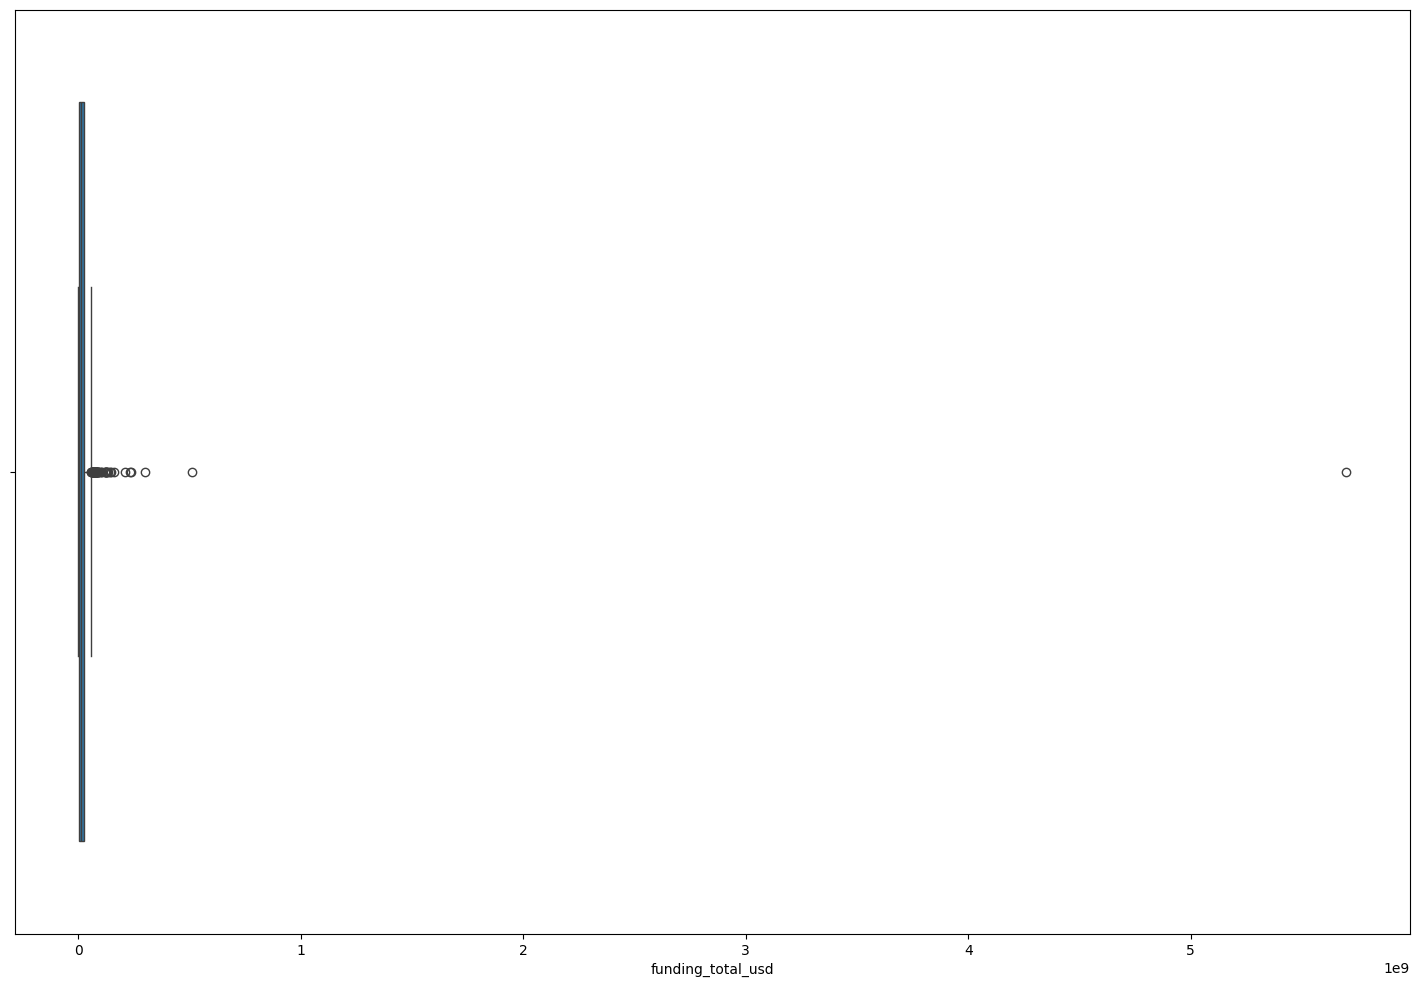

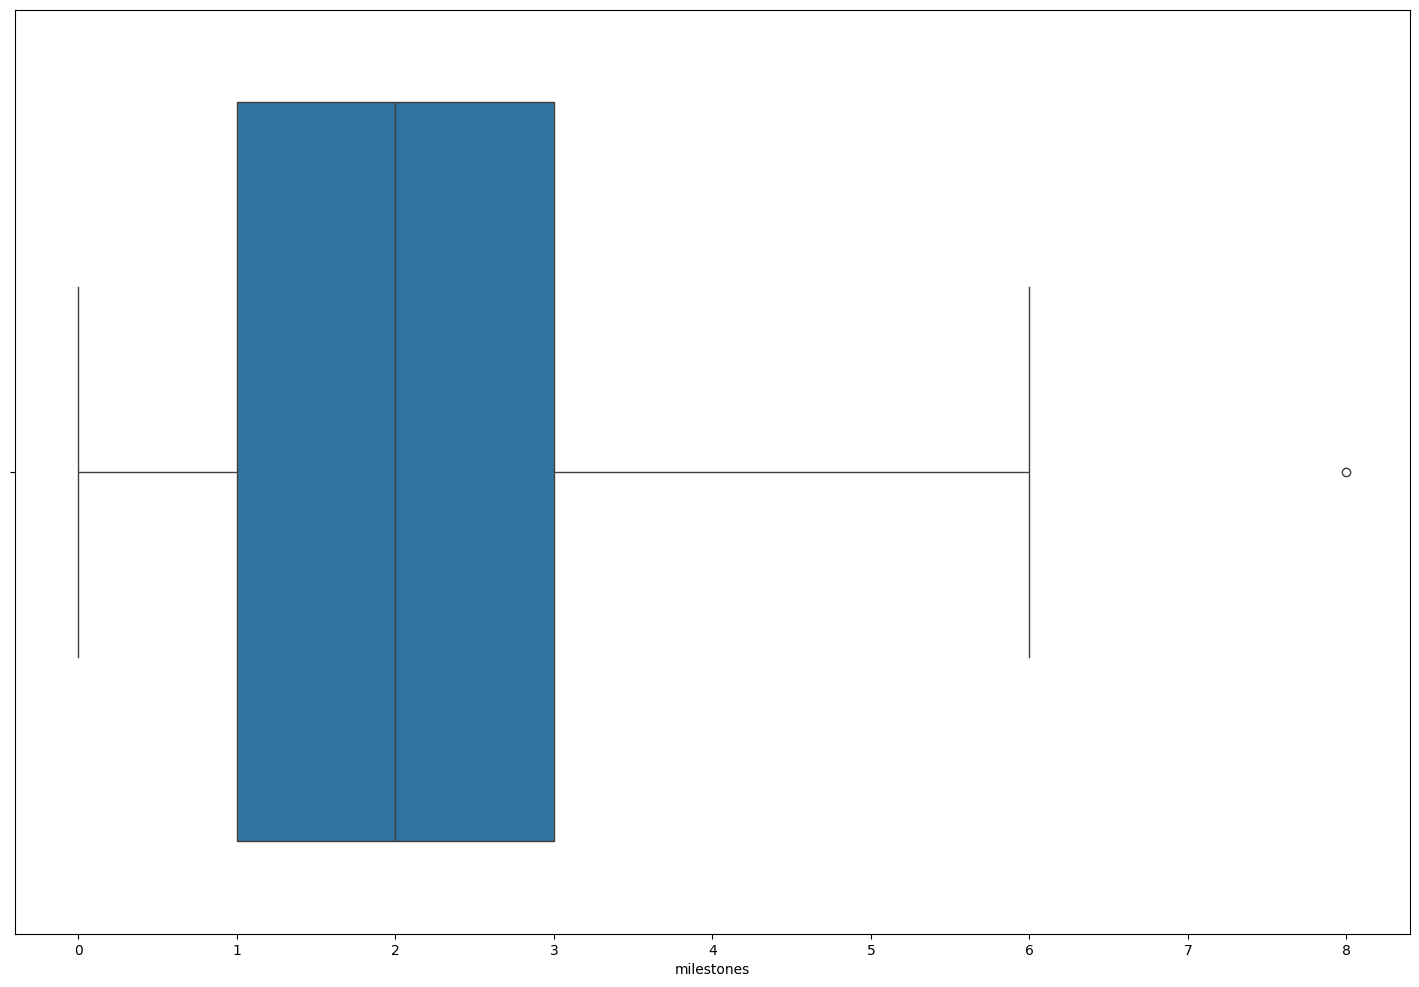

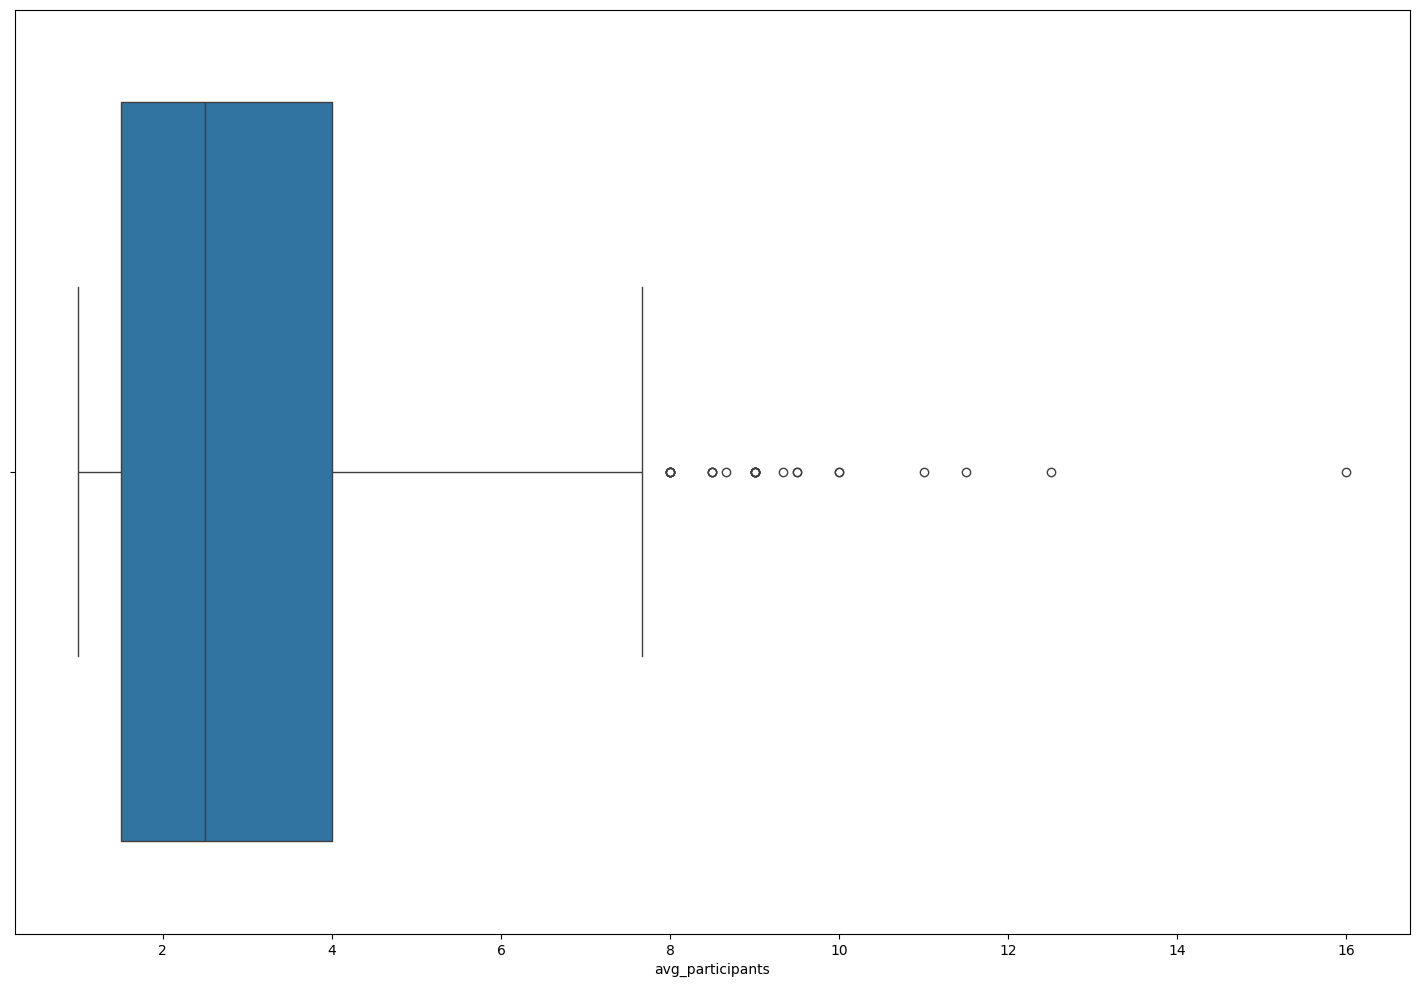

In [70]:
# Visualize outliers
for i in columns_outliers:
  sns.displot(df[i], kde=True)
  plt.show()
for i in columns_outliers:
  print(df[i].skew())
for i in columns_outliers:
  plt.figure(figsize=(18,12))
  sns.boxplot(df[i],orient='h')
  plt.show()

In [71]:
# Remove outliers using IQR
def remove_outliers(df, featuresNumfinal):
 for i in range(0, len(featuresNumfinal)):
   q1 = df[featuresNumfinal[i]].quantile(0.25)
   q3 = df[featuresNumfinal[i]].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   cleaned_data = df[(df[featuresNumfinal[i]] >= lower_bound) &
                     (df[featuresNumfinal[i]] <= upper_bound)]
   return cleaned_data

In [72]:
featuresNumfinal=columns_outliers
new_df=remove_outliers(df,featuresNumfinal)

8. Final Clean Up

In [73]:
new_df.drop(['founded_at','first_funding_at','last_funding_at' ],axis=1, inplace=True)
new_df.drop(['is_CA','is_NY', 'is_MA','is_TX','is_otherstate',
             'is_software','is_web','is_mobile','is_enterprise','is_advertising',
             'is_gamesvideo','is_ecommerce','is_biotech','is_consulting',
             'is_othercategory'],axis=1, inplace=True)

9. Visualization

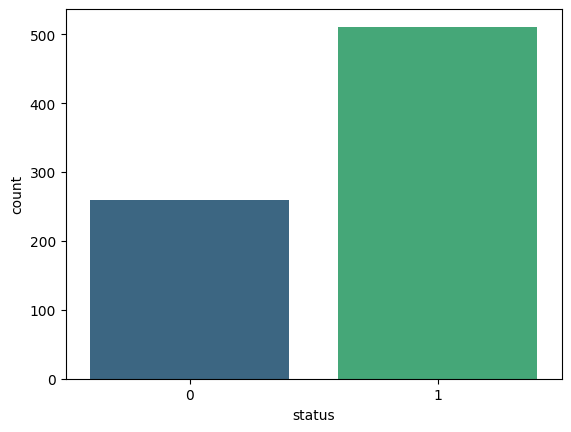

In [74]:
sns.countplot(x = new_df['status'], palette = 'viridis')
plt.show()

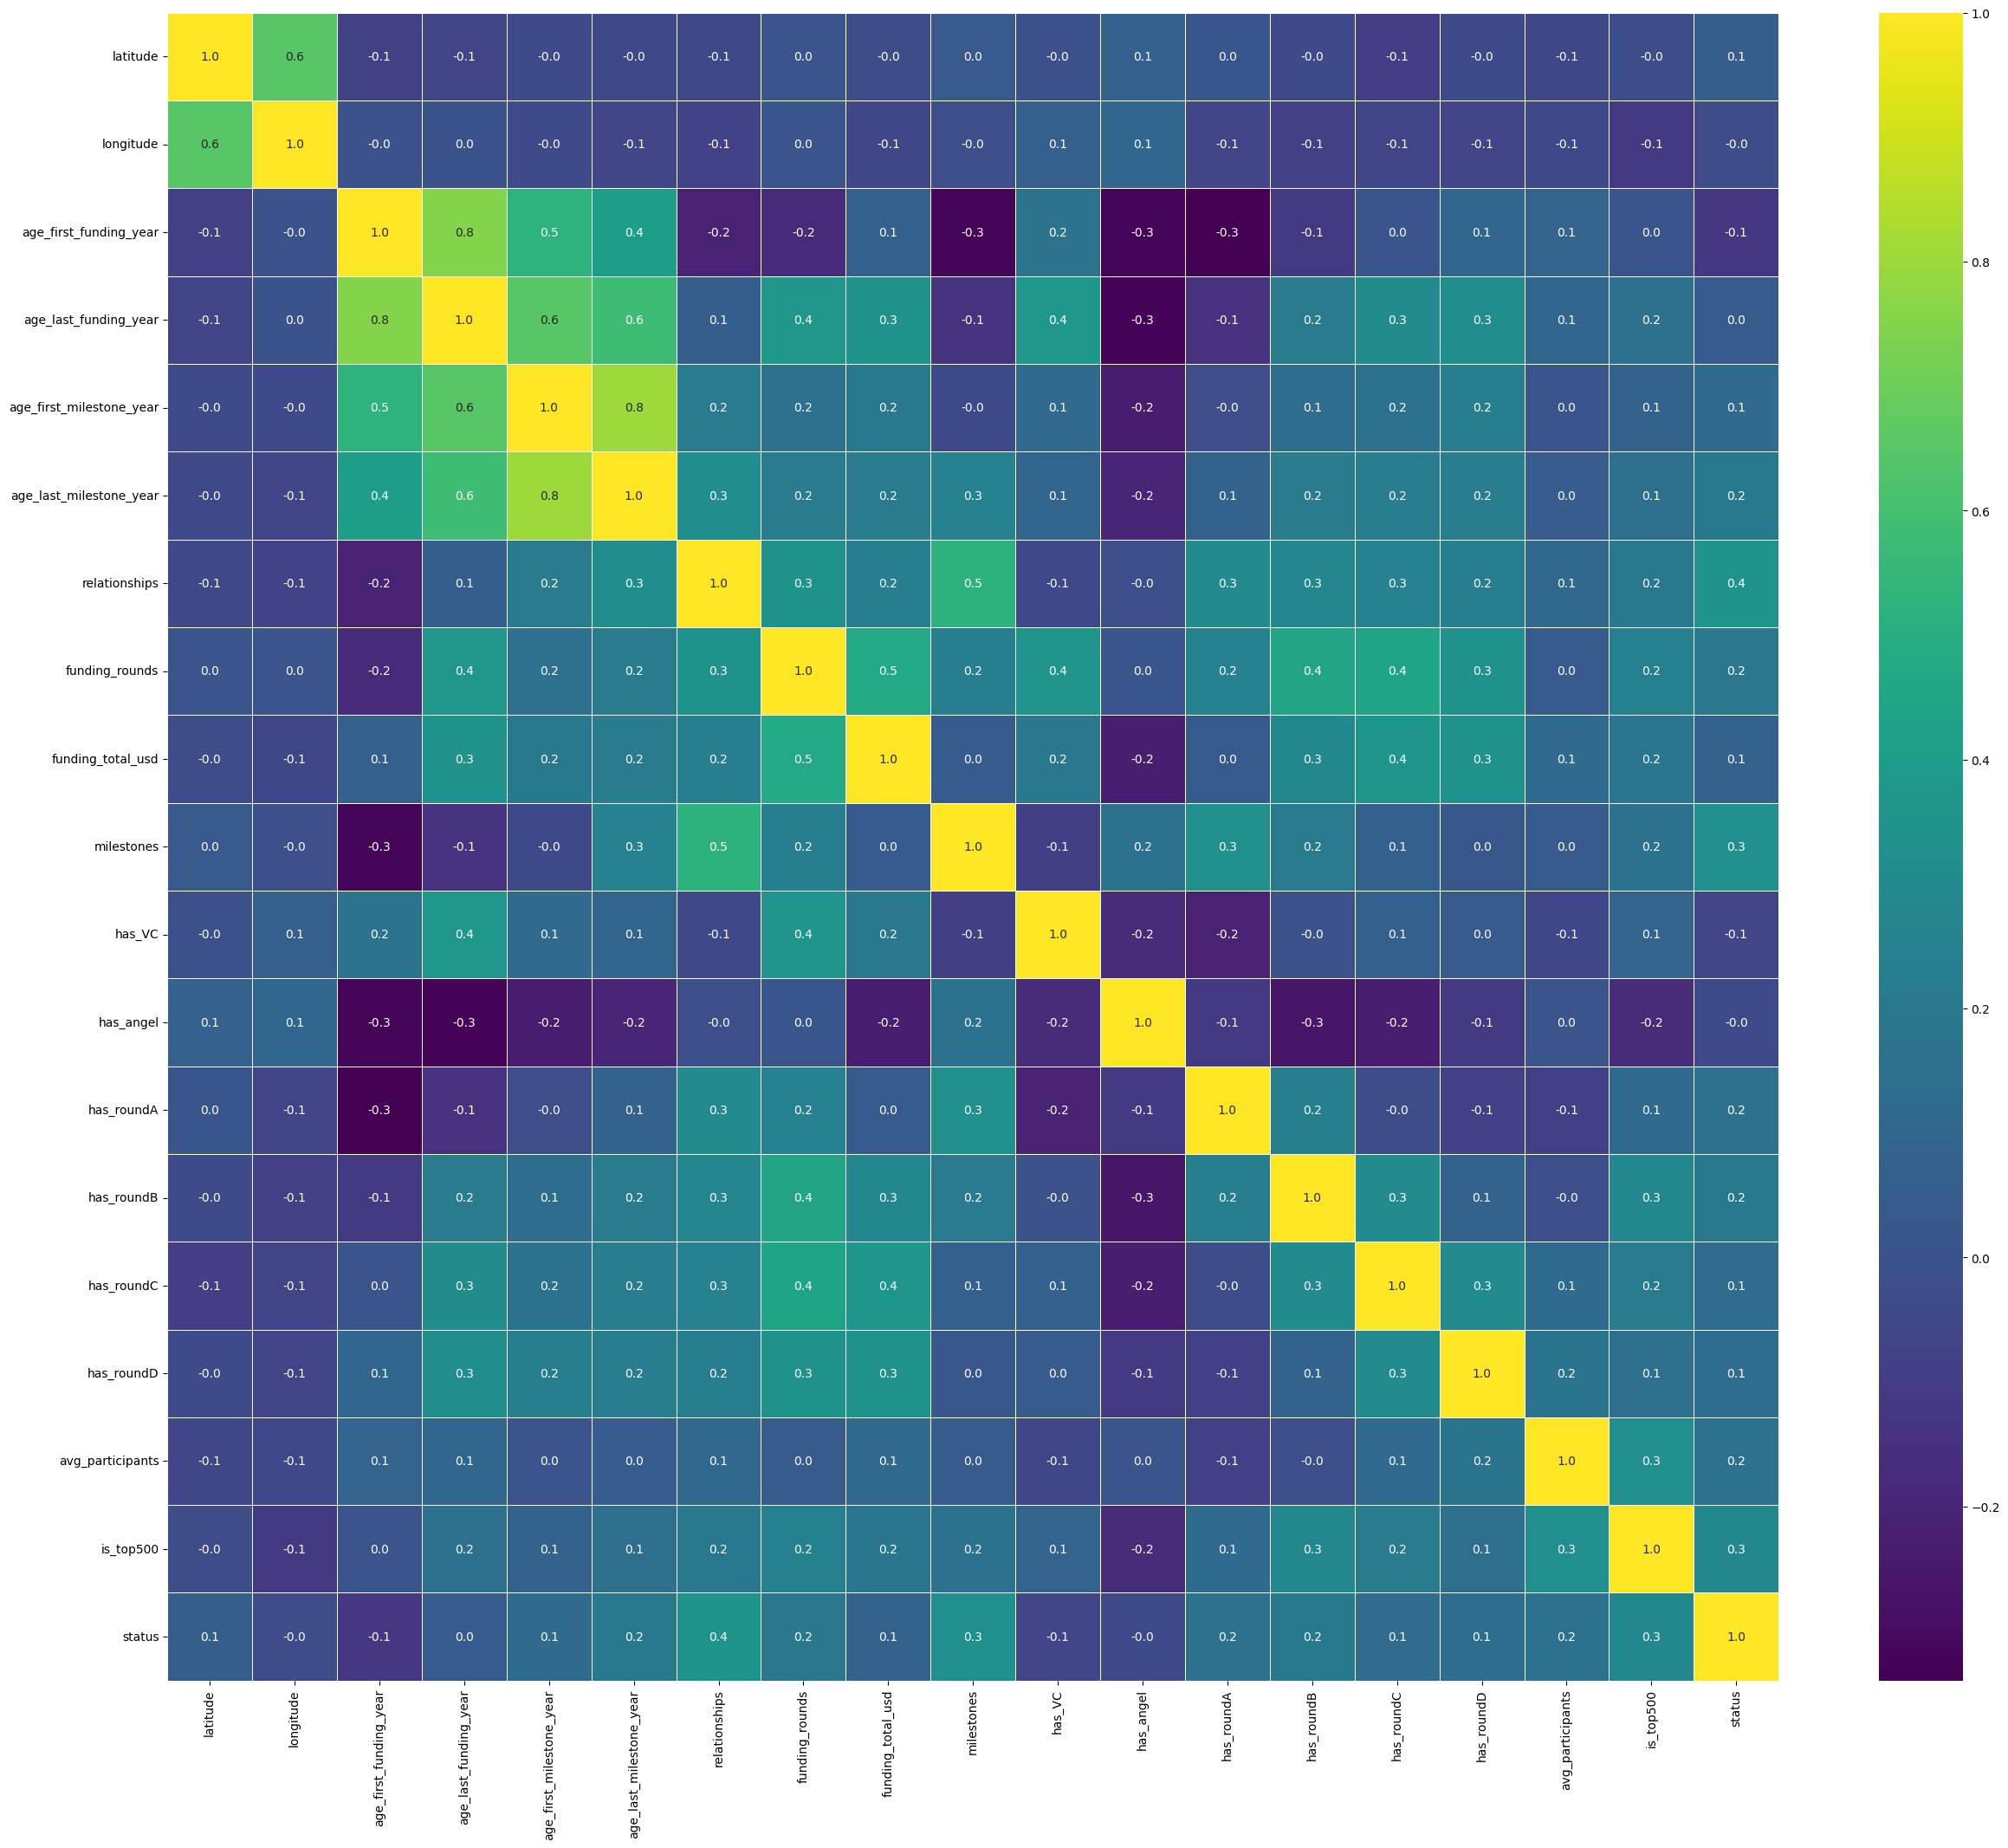

In [75]:
plt.figure(figsize=(30, 25))
sns.heatmap(new_df.select_dtypes(include=['number']).corr(), annot=True, cmap='viridis', linewidths=0.5, fmt='.1f')
plt.show()

<Axes: ylabel='Frequency'>

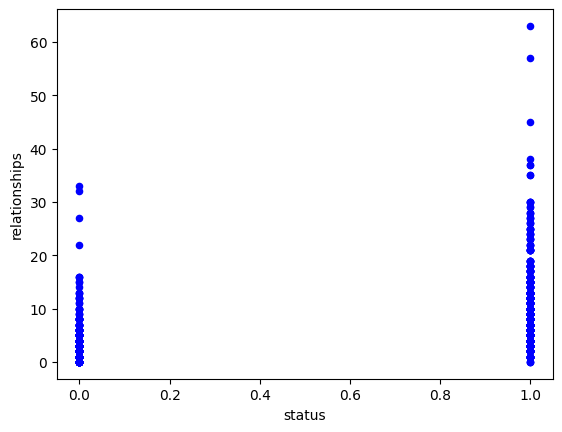

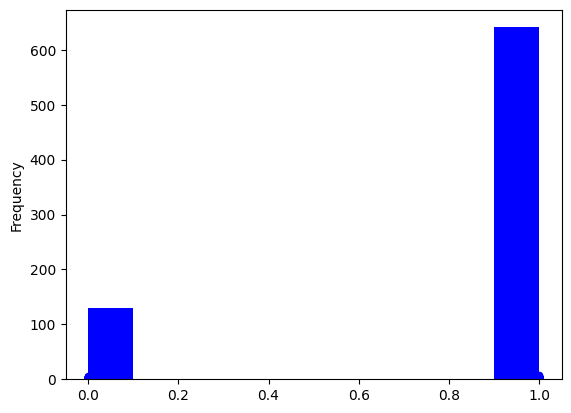

In [76]:
new_df.plot(kind='scatter', x='status', y='relationships', color='blue')
new_df.plot(kind='scatter', x='status', y='milestones', color='blue')
new_df['is_top500'].plot(kind='hist', color='blue')

10. Encoding Categorical Variables

In [77]:
Le=LabelEncoder()
new_df['category_code']=Le.fit_transform(new_df['category_code'])
new_df['city']=Le.fit_transform(new_df['city'])
new_df['zip_code']=Le.fit_transform(new_df['zip_code'])
new_df['state_code']=Le.fit_transform(new_df['state_code'])


11. Train-Test Split

In [78]:
X=new_df.drop(['status'],axis=1)
y=new_df['status']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

12. Model Training

In [79]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3)
decision_tree = decision_tree.fit(x_train,y_train)

In [80]:
# Logistic Regression
logreg = LogisticRegression()
logreg = logreg.fit(x_train, y_train)

In [81]:
#SVM
svm = SVC()
svm = svm.fit(x_train, y_train)

In [82]:
#KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)

13. Model Evaluation

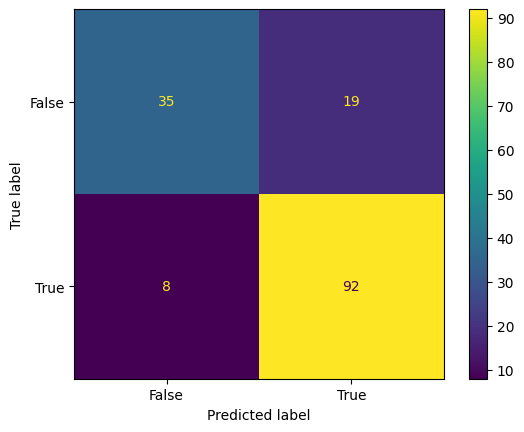

Decision Tree Accuracy: 82.46753246753246
 Decision Tree Classification report:
               precision    recall  f1-score   support

           0       0.81      0.65      0.72        54
           1       0.83      0.92      0.87       100

    accuracy                           0.82       154
   macro avg       0.82      0.78      0.80       154
weighted avg       0.82      0.82      0.82       154



In [83]:
#Decision Tree
y_pred = decision_tree.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', accuracy*100)
report = classification_report(y_test, y_pred)
print(' Decision Tree Classification report:\n', report)


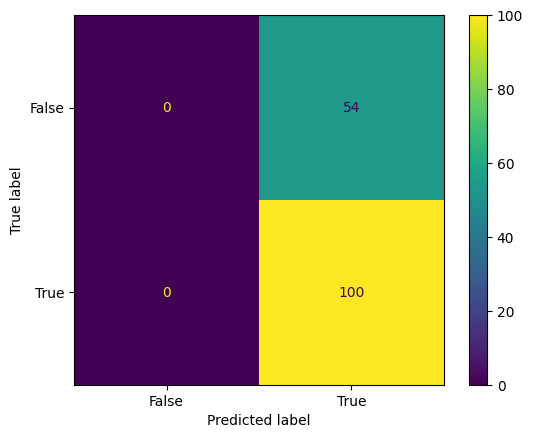

Logistic Regression Accuracy: 64.93506493506493
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



In [84]:
#Logistic Regression
logreg_pred = logreg.predict(x_test)
logreg_cm = metrics.confusion_matrix(y_test, logreg_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=[False, True]).plot()
plt.show()

logreg_acc = accuracy_score(y_test, logreg_pred)
print('Logistic Regression Accuracy:', logreg_acc * 100)
print('Logistic Regression Classification Report:\n', classification_report(y_test, logreg_pred))

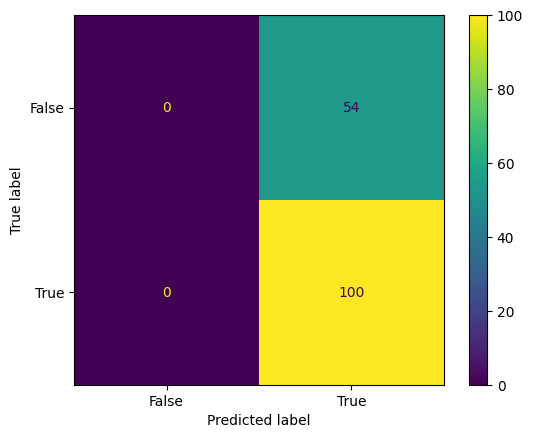

SVM Accuracy: 64.93506493506493
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



In [85]:
#SVM
svm_pred = svm.predict(x_test)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=[False, True]).plot()
plt.show()

svm_acc = accuracy_score(y_test, svm_pred)
print('SVM Accuracy:', svm_acc * 100)
print('SVM Classification Report:\n', classification_report(y_test, svm_pred))

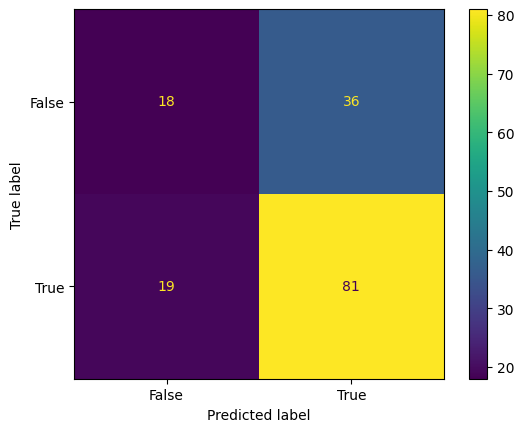

KNN Accuracy: 64.28571428571429
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.33      0.40        54
           1       0.69      0.81      0.75       100

    accuracy                           0.64       154
   macro avg       0.59      0.57      0.57       154
weighted avg       0.62      0.64      0.62       154



In [86]:
#KNN
knn_pred = knn.predict(x_test)
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=[False, True]).plot()
plt.show()

knn_acc = accuracy_score(y_test, knn_pred)
print('KNN Accuracy:', knn_acc * 100)
print('KNN Classification Report:\n', classification_report(y_test, knn_pred))

14. Comparison

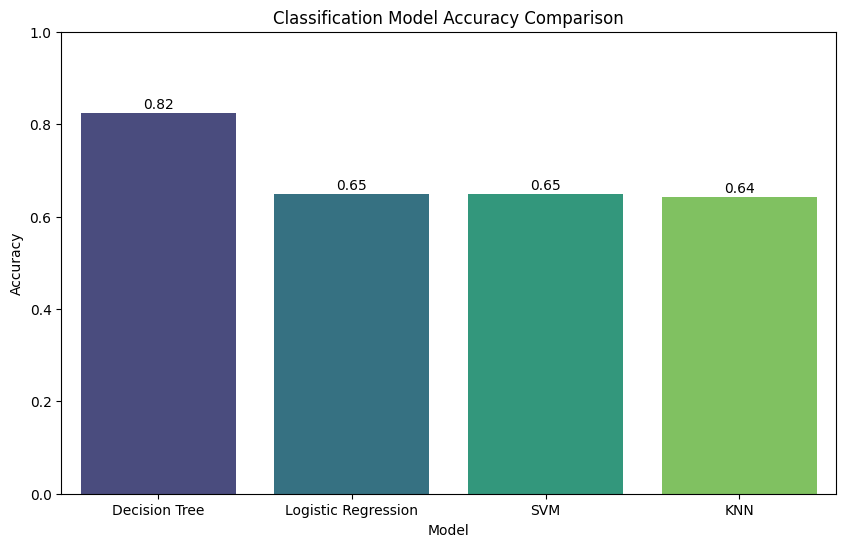

In [87]:
models = ['Decision Tree', 'Logistic Regression', 'SVM', 'KNN']
accuracies = [accuracy, logreg_acc, svm_acc, knn_acc]

results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Classification Model Accuracy Comparison')
plt.ylim(0, 1)
for index, row in results_df.iterrows():
    plt.text(index, row.Accuracy + 0.01, f"{row.Accuracy:.2f}", ha='center')
plt.show()

15. New Prediction

In [88]:
data = pd.DataFrame({
    'state_code':22,	'latitude':40.756054, 'longitude':-73.986951,
    'zip_code':3,	'city':125,	'age_first_funding_year':0.0000,
    'age_last_funding_year':3.9562,	'age_first_milestone_year':4.7616,
    'age_last_milestone_year':5.1507,	'relationships':24,	'funding_rounds':5,
    'funding_total_usd':90000000,	'milestones':3,	'category_code':8,
    'has_VC':1,	'has_angel':0,	'has_roundA':1,	'has_roundB':1,	'has_roundC':1,
    'has_roundD':1,	'avg_participants':3.8000,	'is_top500':1
},index=[0])
data

,state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,22,40.756054,-73.986951,3,125,0.0,3.9562,4.7616,5.1507,24,5,90000000,3,8,1,0,1,1,1,1,3.8,1


In [89]:
prediction=decision_tree.predict(data)
if prediction[0]==1:
  print("The prediction indicates that this venture will be successful")
else:
  print("The prediction indicates that this venture will not be successful")


The prediction indicates that this venture will be successful
